<h1> <center> Regresión Logística </center> </h1>

<p> La regresión logística es un algoritmo de aprendizaje automático de clasificación que se utiliza para predecir la probabilidad de una variable dependiente categórica que sea binaria, es decir, que contega datos codificados como 1 ("Si", "Exito", etc) o 0 ("No, "Fracaso", etc.). Una regresión logistica, por lo tanto, requiere de que la variable dependiente sea binaria. Por tanto, es un método estadístico para predecir clases binarias, del cual obtenemos como resultado una variable dicotómica, es decir dos clases posibles. </p> 
<p> Este algoritmo se basa en la Función Sigmoide </p>
<img src= 'sigmoide.png',width=400,heigth=1000, alt="Flowers in Chania">

<p> Las librerias y datos que utilizaremos son: </p>

In [14]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import statsmodels.api as sm
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, f1_score, roc_auc_score, roc_curve 
import numpy as np
import pandas as pd


In [2]:
df = datasets.load_breast_cancer()
# La información del dataset
print(df.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [3]:
# Miremos la descripción del dataset
print(df.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [4]:
## Llamada de datos
X = df.data
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)     

<p> En muchas ocasiones es necesario escalar los datos, siempre que estos se encuentren en distintas magnitudes, esto lo realizaremos de la siguiente manera: </p>

In [5]:
estandar = StandardScaler()
X_train = estandar.fit_transform(X_train)
X_test  = estandar.transform(X_test)

<h2> Entrenamiento del modelo </h2>

In [6]:
logit = LogisticRegression(solver='lbfgs')
logit.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<h2> Metricas de evaluación de un modelo </h2>
<br/>
Vamos a calcular las metricas para evaluar modelos de clasificación

<br></br>

In [7]:
y_pred = logit.predict(X_test)

<h2> Métricas de rendimiento </h2>
<br/>
<p> Para evaluar los modelos de clasificación se utilizan distintas técnicas de rendimiento, entre las que tenemos: </p>
<ul>
    <li> <b> Exactitud: </b> Es el número de predicciones correctas realizadas por el modelo por el número total de registros </li>
    <li> <b> Precisión: </b> Evaluación de los datos por su desempeño en predicciones positivas  </li>
    <li> <b> Sensibilidad (Recall):</b>El número de predicciones positivas correctas dividido por el número total de positivos</li>
    <li> <b> Especificidad: </b>  (Tasa negativa verdadera) Es el número de predicciones negativas correctas dividido por el número total de negativos</li>
    <li> <b> Puntaje de F1: </b> Es una puntuación única que representa la precisión y sensibilidad </li>
    <li> <b> Curva ROC: </b> Indica que tan bueno es un modelo distinguiendo entre dos escenarios (variables binarias) </li>
 </ul>
 <img src= 'curva_roc.png',width=400,heigth=1000, alt="Flowers in Chania">

<h3> Matriz de confusión </h3>
<br/>
<p> La matriz de confusion es una metrica sencilla para encontrar la prediccion y exactitud de un modelo, Y es utilizada para modelos cuya respuesta es discreta. Las filas de la matriz indican la clase observada o actual y las columnas indican la clase predicha o prediccion </p>
<img src= 'matriz_confusion.png',width=500,heigth=1000, alt="Flowers in Chania">
<p> No es una metrica de rendimiento </p>

In [8]:
con_matrix = confusion_matrix(y_test,y_pred)
print(con_matrix)

[[38  2]
 [ 1 73]]


<h3> Precisión del modelo </h3>

In [9]:
precision = precision_score(y_test,y_pred)
print(precision)

0.9733333333333334


In [10]:
exactitud = accuracy_score(y_test,y_pred)
print(exactitud)

0.9736842105263158


In [11]:
puntajeF1 = f1_score(y_test,y_pred)
print(puntajeF1)

0.9798657718120806


In [12]:
roc_auc = roc_auc_score(y_test,y_pred)
print(roc_auc)

0.9682432432432432


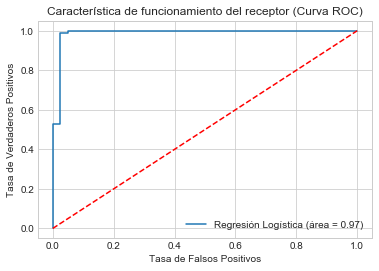

In [15]:
logit_roc_auc = roc_auc_score(y_test,  logit.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logit.predict_log_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Regresión Logística (área = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Característica de funcionamiento del receptor (Curva ROC)')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()